<a href="https://colab.research.google.com/github/ingridmidory/Inferencia-Est-distica/blob/main/Agrupaci%C3%B3nSeriesTiempo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos de Incidencia Municipal 2015 - 2021 enlace para descarga: https://drive.google.com/file/d/1w3Y-jbwN_vhpQAIEzTcO3WjPpSE4OR3f/view

In [ ]:
import pandas as pd
import pathlib
import os
import numpy as np
from IPython.display import Image

In [ ]:
import bokeh.plotting as bpl
import bokeh.palettes as bpt
bpl.output_notebook()

Loading BokehJS ...

- **Pandas:** Biblioteca estándar de manipulación de datos
- **Pathlib:** Biblioteca que se ocupa de las tareas relacionadas con la ruta, como la construcción de nuevas rutas a partir de los nombres de los archivos
- **Os:** Biblioteca para leer o escribir archivos en el sistema

In [ ]:
# Ruta
os.getcwd()

'C:\\Users\\Joselin\\Documents\\OtrosProyectos'

In [ ]:
# Cargar archivo
df = pd.read_csv(os.path.join(pathlib.Path().absolute(),'AgrupaciónSeriesTemporales','datos','mpaldelitos.csv'), encoding='latin1')
df.head(3)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0.0,2.0,1.0,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1.0,2.0,0.0,0.0,0.0


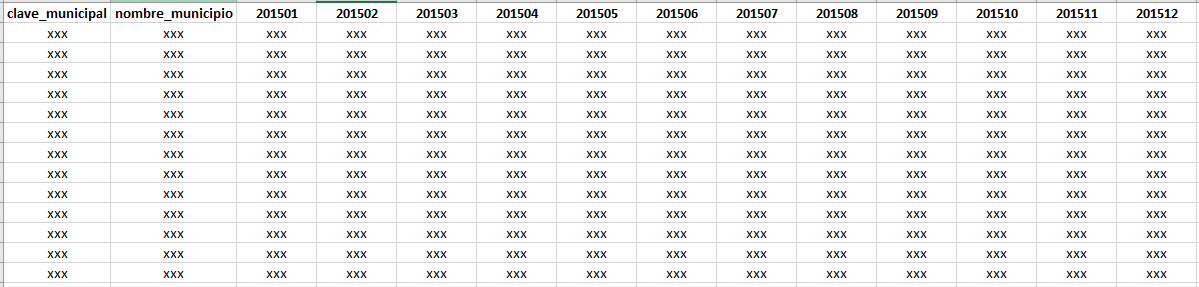

In [ ]:
# Buscamos crear una base estructurada de la siguiente manera
Image(filename= os.path.join(pathlib.Path().absolute(),'AgrupaciónSeriesTemporales','ejemplo_base.png'))

# Estructura

In [ ]:
df.iloc[:, df.columns.get_loc("Modalidad")+1:].columns.str.lower()

Index(['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio',
       'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
      dtype='object')

In [ ]:
# Modificar los nombres de los meses
meses = list(df.iloc[:, df.columns.get_loc("Modalidad")+1:].columns.str.lower())
numeros = list(range(1, 13))
numeros01 = [str(item).zfill(2) for item in numeros]
numeros01
numeros = [str(item).zfill(2) for item in list(range(1, 13))]
numeros

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [ ]:
dictionary = dict(zip(meses, numeros01))
print(dictionary)

{'enero': '01', 'febrero': '02', 'marzo': '03', 'abril': '04', 'mayo': '05', 'junio': '06', 'julio': '07', 'agosto': '08', 'septiembre': '09', 'octubre': '10', 'noviembre': '11', 'diciembre': '12'}


In [ ]:
df.columns = df.columns.str.lower()
df = df.rename(columns=dictionary)
df = df.fillna(0)
df.head(3)

,año,clave_ent,entidad,cve. municipio,municipio,bien jurídico afectado,tipo de delito,subtipo de delito,modalidad,01,...,03,04,05,06,07,08,09,10,11,12
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0.0,2.0,1.0,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1.0,2.0,0.0,0.0,0.0


In [ ]:
df['cve. municipio'] = df['cve. municipio'].astype(str).str.zfill(5)
df.head(3)

,año,clave_ent,entidad,cve. municipio,municipio,bien jurídico afectado,tipo de delito,subtipo de delito,modalidad,01,...,03,04,05,06,07,08,09,10,11,12
0,2015,1,Aguascalientes,01001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0.0,2.0,1.0,0.0,1.0
1,2015,1,Aguascalientes,01001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,01001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1.0,2.0,0.0,0.0,0.0


In [ ]:
df01 = df.groupby(['año','cve. municipio'])[df.iloc[:, df.columns.get_loc("modalidad")+1:].columns].sum().reset_index()
df01.head(3)

,año,cve. municipio,01,02,03,04,05,06,07,08,09,10,11,12
0,2015,01001,1528,1479,1674,1634,1595,1608,1551,1599.0,1543.0,1500.0,1557.0,1532.0
1,2015,01002,20,10,19,16,14,29,28,33.0,14.0,24.0,34.0,6.0
2,2015,01003,45,54,35,45,48,51,44,33.0,56.0,56.0,38.0,49.0


In [ ]:
df02 = pd.pivot_table(df01, values=['01','02','03','04','05','06','07'], index='cve. municipio',
                    columns=['año'], aggfunc=np.sum, fill_value=0)
df02.columns = ['%s%s' % (a, '%s' % b if b else '') for a, b in df02.columns]
df02 = df02.reset_index()
df02

,cve. municipio,012015,012016,012017,012018,012019,012020,012021,022015,022016,...,062019,062020,062021,072015,072016,072017,072018,072019,072020,072021
0,01001,1528,1447,1678,2312,2117,2305,2040,1479,1356,...,2327,2074,2172,1551,1468,2286,2790,2378,2067,2115
1,01002,20,17,37,44,79,68,67,10,16,...,83,84,90,28,41,47,60,83,91,61
2,01003,45,53,57,72,70,98,57,54,42,...,82,68,62,44,49,82,84,77,68,60
3,01004,9,1,15,12,22,20,31,14,3,...,39,42,25,7,5,27,24,39,24,23
4,01005,78,117,125,233,266,257,197,101,149,...,255,251,271,138,157,224,294,288,276,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,32054,0,3,6,9,4,4,5,1,3,...,17,12,2,5,8,8,4,2,6,5
2474,32055,16,12,23,18,28,46,35,27,16,...,42,51,49,28,11,12,34,34,42,28
2475,32056,293,273,327,361,376,445,324,315,264,...,386,381,413,361,277,322,346,389,360,389
2476,32057,12,13,25,21,30,30,15,23,19,...,39,36,29,11,21,18,17,15,28,24


In [ ]:
#df02.to_csv(os.path.join(pathlib.Path().absolute(),'AgrupaciónSeriesTemporales','df02.csv'), index=False)

In [ ]:
df02['cve. municipio'].nunique()

2478

In [ ]:
municipios = df02['cve. municipio'].tolist()
municipios[2]

'01003'

In [ ]:
# Formato
X = df02.iloc[:,1:].values
X

array([[1528, 1447, 1678, ..., 2378, 2067, 2115],
       [  20,   17,   37, ...,   83,   91,   61],
       [  45,   53,   57, ...,   77,   68,   60],
       ...,
       [ 293,  273,  327, ...,  389,  360,  389],
       [  12,   13,   25, ...,   15,   28,   24],
       [   0,    4,    2, ...,    5,    2,    0]], dtype=int64)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=100, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(X)
clusters

array([69,  2,  1, ..., 21, 23, 72], dtype=int64)

In [ ]:
# Crear base para mapear
data = {'cvemun': municipios, 'etiqueta_cluster': clusters.tolist()}
df_clusters = pd.DataFrame(data)
df_clusters

,cvemun,etiqueta_cluster
0,01001,69
1,01002,2
2,01003,1
3,01004,47
4,01005,22
...,...,...
2473,32054,42
2474,32055,2
2475,32056,21
2476,32057,23


In [ ]:
df_clusters.to_csv(os.path.join(pathlib.Path().absolute(),'AgrupaciónSeriesTemporales','df_clusters_100.csv'),index=False)

In [ ]:
base_graf = pd.melt(df02, id_vars=['cve. municipio'], value_name='carpetas', var_name='anio_mes')
base_graf = base_graf.merge(df_clusters,  left_on='cve. municipio', right_on='cvemun')[['cvemun', 'anio_mes', 'carpetas', 'etiqueta_cluster']]
base_graf

,cvemun,anio_mes,carpetas,etiqueta_cluster
0,01001,012015,1528,1
1,01001,012016,1447,1
2,01001,012017,1678,1
3,01001,012018,2312,1
4,01001,012019,2117,1
...,...,...,...,...
121417,32058,072017,3,6
121418,32058,072018,2,6
121419,32058,072019,5,6
121420,32058,072020,2,6


In [ ]:
base_graf.groupby('etiqueta_cluster')['etiqueta_cluster'].count()

etiqueta_cluster
0       196
1       588
2       735
3     10486
4      3430
5       245
6    103439
7      1274
8       147
9       882
Name: etiqueta_cluster, dtype: int64

In [ ]:
colores = bpt.Category20[12]
municipios_graf = list(base_graf[base_graf['etiqueta_cluster']==0]['cvemun'].unique())
colores[0]
municipios_graf[0]

'02002'

In [ ]:
from bokeh.models import  Legend

In [ ]:
p = bpl.figure(plot_width=800, plot_height=350, x_range=subset['anio_mes'].astype(str),toolbar_location=None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.major_label_orientation = 3.14/2
p.yaxis.major_label_orientation = 'horizontal'
p.outline_line_color = "White"


for c in range(0, len(municipios_graf)):
    subset = base_graf[base_graf['cvemun']==municipios_graf[c]].reset_index() 
    p.line(x=subset['anio_mes'].astype(str),y=subset['carpetas'],color=colores[c],legend_label=municipios_graf[c],line_dash='dashed', line_width=2)
    #p.legend.location = (0, 260)
    #p.legend.orientation = "horizontal"
    
p.add_layout(Legend(), 'right')
bpl.show(p)

In [ ]:
p = bpl.figure(plot_width=800, plot_height=350, x_range=subset['anio_mes'].astype(str),toolbar_location=None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.major_label_orientation = 3.14/2
p.yaxis.major_label_orientation = 'horizontal'
p.outline_line_color = "White"


for c in range(0, len(municipios_graf)):
    subset = base_graf[base_graf['cvemun']==municipios_graf[c]].reset_index() 
    p.line(x=subset['anio_mes'].astype(str),y=subset['carpetas'],color=colores[c],line_dash='dashed', line_width=2)
    #p.legend.location = (0, 260)
    #p.legend.orientation = "horizontal"
    
p.add_layout(Legend(), 'right')
bpl.show(p)